In [40]:
import warnings
warnings.filterwarnings('ignore')
from tensorflow import keras
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.models import load_model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import keras.utils as image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
from keras.optimizers import SGD


In [41]:
train_path = 'Datasets/train'
valid_path = 'Datasets/test'

In [42]:
IMAGE_SIZE = [224, 224]
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [43]:
for layer in vgg.layers:
    layer.trainable = False

In [44]:
folders = glob('Datasets/train/*')
x = Flatten()(vgg.output)

In [45]:
prediction = Dense(len(folders), activation='softmax')(x)
# crear un objeto modelo
model = Model(inputs=vgg.input, outputs=prediction)
# ver la estructura del modelo
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [46]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [56]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

valid_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 35,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 35,
                                            class_mode = 'categorical')

validation_set = test_datagen.flow_from_directory('Datasets/val',
                                            target_size = (224, 224),
                                            batch_size = 35,
                                            class_mode = 'categorical')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [57]:
history = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=3,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/3
  8/150 [>.............................] - ETA: 6:18 - loss: 0.2005 - accuracy: 0.9286

KeyboardInterrupt: 

In [50]:
history_df = pd.DataFrame(history.history)

print(history_df['loss'])
print(history_df['accuracy'])
print(history_df['val_loss'])
print(history_df['val_accuracy'])

0    0.209701
1    0.123122
2    0.058826
Name: loss, dtype: float64
0    0.929487
1    0.948718
2    0.982372
Name: accuracy, dtype: float64
0    0.622915
1    0.529433
2    0.790051
Name: val_loss, dtype: float64
0    0.7500
1    0.6875
2    0.8125
Name: val_accuracy, dtype: float64


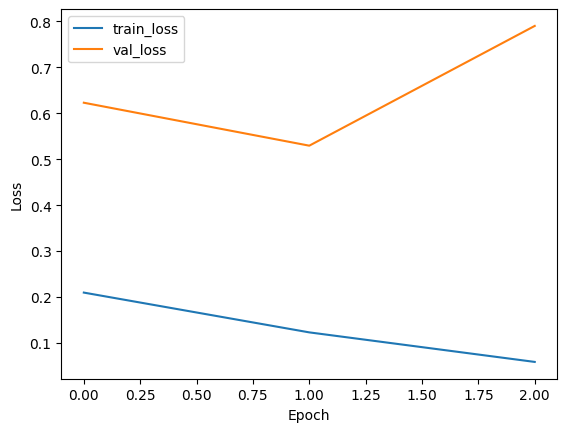

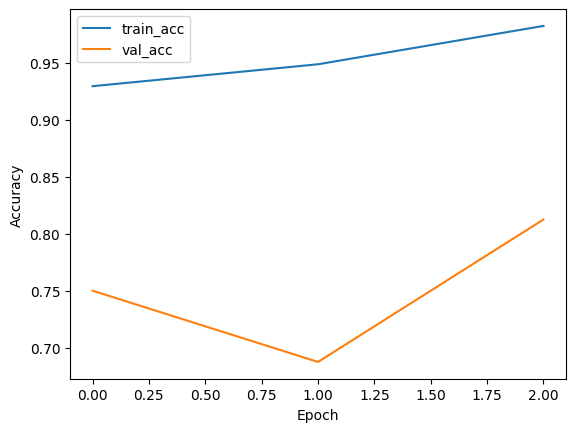

In [51]:
import matplotlib.pyplot as plt

# Obtenemos los valores de loss y accuracy para los datos de entrenamiento y validación
train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

# Graficamos la evolución del loss
plt.plot(train_loss, label='train_loss')
plt.plot(val_loss, label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Graficamos la evolución del accuracy
plt.plot(train_acc, label='train_acc')
plt.plot(val_acc, label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [53]:
model.evaluate(test_set)

42/63 [===================>..........] - ETA: 17s - loss: 0.1684 - accuracy: 0.9262

KeyboardInterrupt: 

In [116]:
model.save('chest_xray.h5')

In [58]:
model=load_model('chest_xray.h5')

In [63]:
img=image.load_img('PRUEBAS/NOR1.jpeg',target_size=(224,224))
x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)
img_data=preprocess_input(x)

In [64]:
classes=model.predict(img_data)
result=int(classes[0][0])

print(classes)
if result==0:
    print("Persona afectada por NEUMONÍA")
else:
    print("El resultado es normal")

1/1 [==============================] - 0s 122ms/step
[[1. 0.]]
El resultado es normal
